# Welcome to Chest_X-Ray14 Project

In this project, I aim to gain a deep understading some important CNN architectures such as; VGG, AlexNet, Inception, ResNet and MobileNet. I also research some advanced architectures for improving performance. Also, data augmentation and other filtering functions will be applied. The results will be compared with accuracy, recall, precision and F1 score.

##Data Information

The NIH Chest X-Ray dataset consists of 112,120 chest X-ray images from 30,805 patients. Disease labels were extracted from radiology reports using natural language processing (NLP), achieving over 90% accuracy. This dataset is suitable for weakly supervised learning and developing CAD (computer-aided diagnosis) systems to support clinical diagnosis.

The dataset includes 15 classes, representing 14 disease types and one class for "No findings." Images can be classified as "No findings" or as one or more of the following disease classes:

- Atelectasis
- Consolidation
- Infiltration
- Pneumothorax
- Edema
- Emphysema
- Fibrosis
- Effusion
- Pneumonia
- Pleural Thickening
- Cardiomegaly
- Nodule/Mass
- Hernia

**Article about dataset**:

Wang X, Peng Y, Lu L, Lu Z, Bagheri M, Summers RM. ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases. IEEE CVPR 2017, ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf

# Upload and Get Ready Datasets


## Upload Datasets
Data can be accessable on https://www.kaggle.com/datasets/nih-chest-xrays/data.

In [1]:
"""Do not run this code more than once."""
# Install Kaggle Library
!pip install kaggle

# Create a directory for Kaggle identification.
!mkdir -p ~/.kaggle

# Upload kaggle.json file for Kaggle API.
from google.colab import files
files.upload()   # Choose kaggle.json file

# Carry the file and arrange the settings.
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download directly data to Google Drive.
!kaggle datasets download -d nih-chest-xrays/data -p "/content/drive/MyDrive/Chest_Xray_Dataset"

# Unzip the file to Google Drive Account.
!unzip "/content/drive/MyDrive/Chest_Xray_Dataset/data.zip" -d "/content/drive/MyDrive/Chest_Xray_Dataset"

KeyboardInterrupt: 

In [1]:
# Get annotations and train-test data.
import pandas as pd

base_path = '/content/drive/MyDrive/Chest_Xray_Dataset/'

data_entry = pd.read_csv(base_path + 'Data_Entry_2017.csv')
bbox = pd.read_csv(base_path + 'BBox_List_2017.csv')

train_list = pd.read_table(base_path + 'train_val_list.txt', header=None)
test_list = pd.read_table(base_path + 'test_list.txt', header=None)

##Arrange Datasets
Some arrangements are desired.

In [2]:
data_entry.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
# Set Index with Image Index.
data_entry.set_index('Image Index', inplace=True)

In [4]:
data_entry.head(5)

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
Image Index,,,,,,,,,,,
00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [5]:
bbox.head(5)

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [6]:
# Rename some columns.
bbox = bbox.rename(columns={'Bbox [x': 'x', 'h]': 'h'})

In [7]:
bbox.head(5)

,Image Index,Finding Label,x,y,w,h,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


# Data Visualization

## About Databases
Retrive an image, names of diseases and related bounded boxes.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

def getImageInfo(image_name):
  try:
    disease_name = data_entry['Finding Labels'][image_name]
    print("Image Name:", image_name + "\n")
    print("Disease Name:", disease_name + "\n")
  except:
    print("No disease information found for this image.\n")

  img = None
  found_image = False

  # Try to find the image in one loop
  for i in range(1, 13):
    # Construct the image path
    path = os.path.join(base_path, f"images_{i:03}/images/", image_name)
    if os.path.exists(path):  # Check if the file exists before trying to read it
        img = mpimg.imread(path)
        found_image = True
        break  # Break once the image is found

  if found_image:
    # Normalize image data if necessary
    if img.dtype in ['float32', 'float64']:
      img = (img * 255).astype(np.uint8)

    # Display the full image
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Full Image", fontsize=16)
    plt.show()

    bbox_data = bbox[bbox["Image Index"] == image_name]

    if not bbox_data.empty:
      x = int(bbox_data['x'].iloc[0])
      y = int(bbox_data['y'].iloc[0])
      w = int(bbox_data['w'].iloc[0])
      h = int(bbox_data['h'].iloc[0])

      # Draw bounding box on the image
      img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (255, 0, 0), 2)

      # Display the image with bounding box
      plt.figure(figsize=(8, 8))
      plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.title(f"The bounded box that gave rise to {disease_name}.", fontsize=16)
      plt.show()
    else:
      print("Bounding boxes are not available for this image.")
  else:
    print("Image not found.")

Image Name: 00014716_007.png

Disease Name: Atelectasis|Effusion|Mass



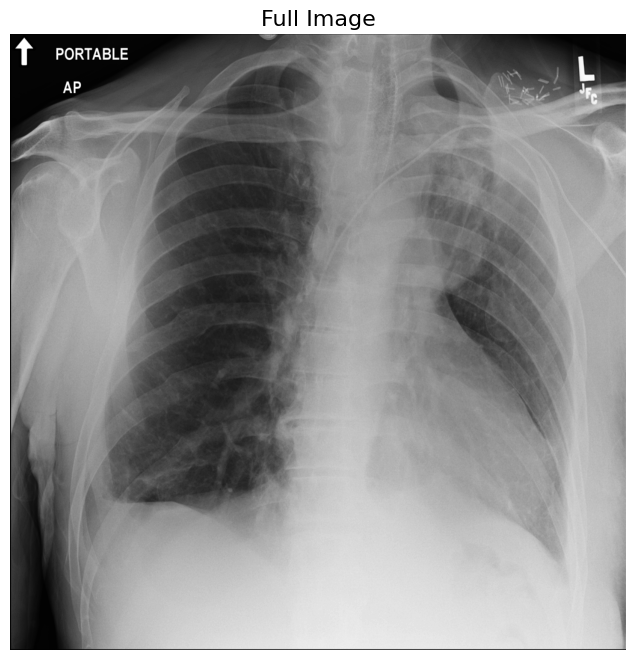

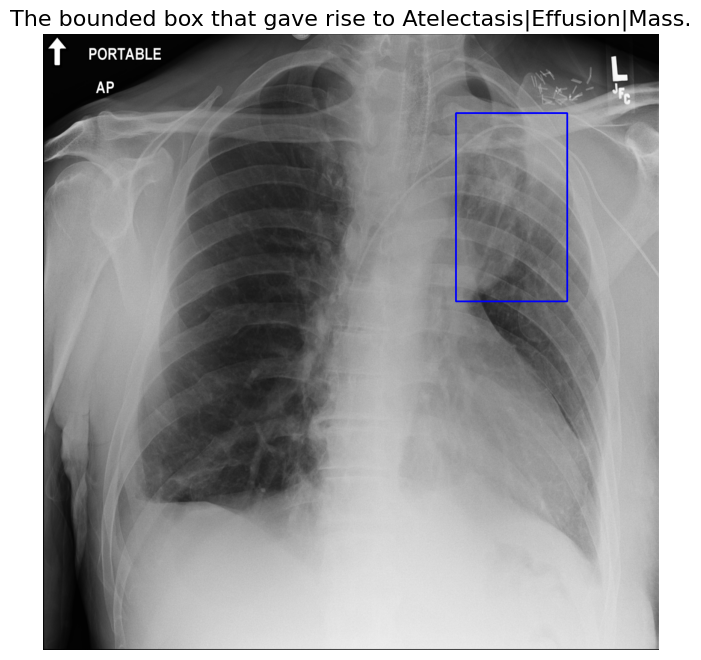

In [9]:
getImageInfo('00014716_007.png')

## Data Distribution
Examine data distribution and analize normal-abnormal situations.

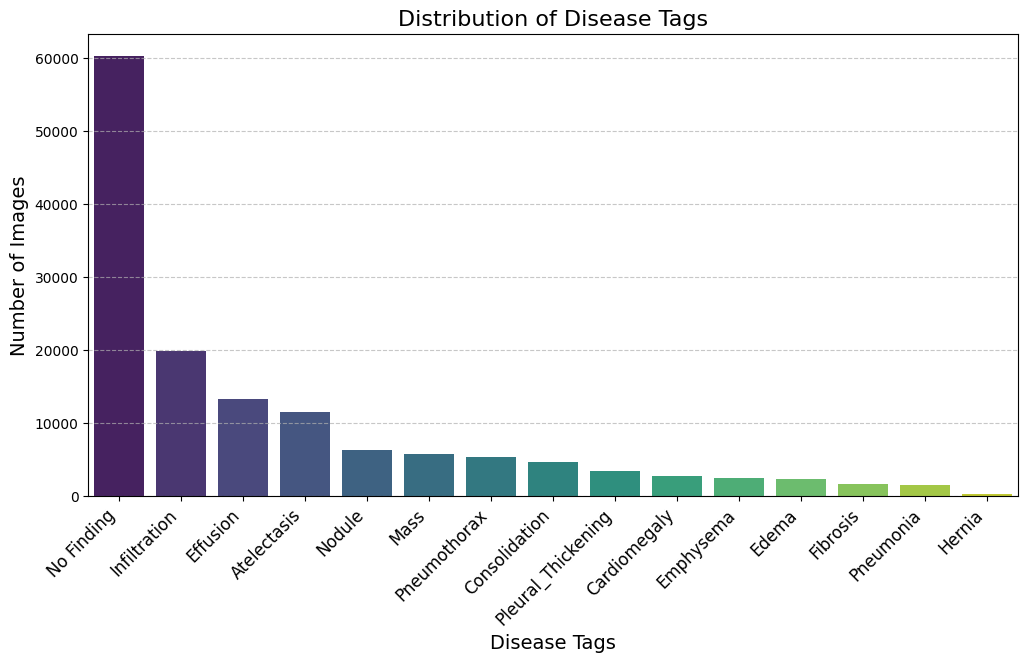

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_labels = []

for labels in data_entry['Finding Labels']:
  if isinstance(labels, list):
      all_labels.extend(labels)
  else:
      all_labels.extend(labels.split('|'))

label_counts = pd.Series(all_labels).value_counts()

label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Disease', 'Number of Images']

plt.figure(figsize=(12, 6))
sns.barplot(data=label_counts_df, x='Disease', y='Number of Images',hue="Disease" , palette='viridis', legend=False)

plt.title('Distribution of Disease Tags', fontsize=16)
plt.xlabel('Disease Tags', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

According to upper statistics, there is a baised distribution which affects performance of deep learning algorithms.

## About Image Quality
Analyze Image Quality if there are any required arrangments.

In [11]:
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import concurrent.futures
import os
from skimage.metrics import structural_similarity as ssim
from scipy import stats

class ImageQualityChecker:
    """
    A class for checking image quality metrics and identifying problematic images.

    Parameters:
        min_size (tuple): Minimum acceptable image dimensions (height, width)
        min_brightness (int): Minimum acceptable average brightness
        max_brightness (int): Maximum acceptable average brightness
        min_contrast (int): Minimum acceptable contrast
        blur_threshold (int): Threshold for blur detection (lower means more strict)
    """

    def __init__(self, min_size=(224, 224), min_brightness=30, max_brightness=225,
                 min_contrast=30, blur_threshold=50):
        self.min_size = min_size
        self.min_brightness = min_brightness
        self.max_brightness = max_brightness
        self.min_contrast = min_contrast
        self.blur_threshold = blur_threshold

    def check_image(self, image):
        """
        Performs comprehensive quality check on a single image.

        Args:
            image: numpy array of the image (BGR format)

        Returns:
            dict: Results containing validity, issues, and quality metrics
        """
        results = {
            'is_valid': True,
            'issues': [],
            'metrics': {}
        }

        # Size check
        if image.shape[0] < self.min_size[0] or image.shape[1] < self.min_size[1]:
            results['is_valid'] = False
            results['issues'].append('size_too_small')

        # Blur check
        blur_score = self._check_blur(image)
        results['metrics']['blur_score'] = blur_score
        if blur_score < self.blur_threshold:
            results['is_valid'] = False
            results['issues'].append('too_blurry')

        # Brightness check
        brightness = self._check_brightness(image)
        results['metrics']['brightness'] = brightness
        if brightness < self.min_brightness or brightness > self.max_brightness:
            results['is_valid'] = False
            results['issues'].append('bad_brightness')

        # Contrast check
        contrast = self._check_contrast(image)
        results['metrics']['contrast'] = contrast
        if contrast < self.min_contrast:
            results['is_valid'] = False
            results['issues'].append('low_contrast')

        # Noise check
        noise_level = self._estimate_noise(image)
        results['metrics']['noise_level'] = noise_level
        if noise_level > 30:
            results['issues'].append('high_noise')

        # Empty image check
        if self._is_empty_image(image):
            results['is_valid'] = False
            results['issues'].append('empty_image')

        return results

    def process_image_path(self, image_path):
        """
        Process a single image from its file path.

        Args:
            image_path: str or Path object pointing to the image file

        Returns:
            dict: Quality check results including file path
        """
        try:
            image = cv2.imread(str(image_path))
            if image is None:
                return {
                    'path': str(image_path),
                    'is_valid': False,
                    'issues': ['failed_to_load'],
                    'metrics': {}
                }

            results = self.check_image(image)
            results['path'] = str(image_path)

            return results

        except Exception as e:
            return {
                'path': str(image_path),
                'is_valid': False,
                'issues': [f'error: {str(e)}'],
                'metrics': {}
            }

    def _check_blur(self, image):
        """Calculate image blur score using Laplacian variance"""
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return cv2.Laplacian(image, cv2.CV_64F).var()

    def _check_brightness(self, image):
        """Calculate average brightness of the image"""
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return np.mean(image)

    def _check_contrast(self, image):
        """Calculate image contrast using standard deviation"""
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return image.std()

    def _estimate_noise(self, image):
        """Estimate noise level in the image"""
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        H, W = image.shape
        M = [[1, -2, 1],
             [-2, 4, -2],
             [1, -2, 1]]
        sigma = np.sum(np.sum(np.absolute(cv2.filter2D(image, -1, np.array(M)))))
        sigma = sigma * np.sqrt(0.5 * np.pi) / (6 * (W-2) * (H-2))
        return sigma

    def _is_empty_image(self, image):
        """Check if image is empty or single-colored"""
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return np.std(image) < 5

In [12]:
import concurrent.futures
import os
import pandas as pd
from tqdm import tqdm

def process_dataset_quality(image_paths, batch_size=100, num_workers=4,
                            save_results=True, output_dir='quality_results'):
    """
    Process multiple images and generate quality report.

    Args:
        image_paths: List of image paths to process
        batch_size: Number of images to process in each batch
        num_workers: Number of parallel workers
        save_results: Whether to save results to files
        output_dir: Directory to save result files

    Returns:
        tuple: (quality_stats, problematic_images)
    """
    checker = ImageQualityChecker()
    all_results = []
    problematic_images = []

    # Process images in batches with progress bar
    total_batches = (len(image_paths) + batch_size - 1) // batch_size

    for batch_idx in tqdm(range(total_batches), desc="Processing images"):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(image_paths))
        batch_paths = image_paths[start_idx:end_idx]

        with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
            batch_results = list(executor.map(checker.process_image_path, batch_paths))

        for result in batch_results:
            all_results.append(result)
            if not result['is_valid']:
                problematic_images.append(result['path'])

    # Calculate statistics
    quality_stats = {
        'total_images': len(image_paths),
        'valid_images': sum(1 for r in all_results if r['is_valid']),
        'invalid_images': sum(1 for r in all_results if not r['is_valid']),
        'issues': {},
        'metrics': {
            'blur_scores': [],
            'brightness_values': [],
            'contrast_values': [],
            'noise_levels': []
        }
    }

    # Save results if requested
    if save_results:
        os.makedirs(output_dir, exist_ok=True)
        df_results = pd.DataFrame(all_results)
        df_results.to_csv(f"{output_dir}/quality_results.csv", index=False)

        with open(f"{output_dir}/quality_summary.txt", 'w') as f:
            f.write("Quality Analysis Summary\n")
            f.write("=" * 30 + "\n")
            f.write(f"Total Images: {quality_stats['total_images']}\n")
            f.write(f"Valid Images: {quality_stats['valid_images']}\n")
            f.write(f"Invalid Images: {quality_stats['invalid_images']}\n\n")

            f.write("Issues Found:\n")
            for issue, count in quality_stats['issues'].items():
                f.write(f"{issue}: {count}\n")

    return quality_stats, problematic_images


Check quality of an image.

In [13]:
# Initialize the checker
checker = ImageQualityChecker()

# Check a single image
image_path = base_path+"images_001/images/00000001_000.png"
image = cv2.imread(image_path)
results = checker.check_image(image)

# Print results
print(f"Image is valid: {results['is_valid']}")
print(f"Issues found: {results['issues']}")
print(f"Quality metrics: {results['metrics']}")

Image is valid: True
Issues found: []
Quality metrics: {'blur_score': 61.83163293434245, 'brightness': 128.13570880889893, 'contrast': 67.42323200014457, 'noise_level': 0.6104431310629318}


Check quality of sub dataset.

In [15]:
"""
We recommend that you perform this
operation on a more powerful
processor or GPU.
"""
# Collect image paths
dataset_path = Path(base_path+"images_001/images")
image_paths = list(dataset_path.glob("**/*.png"))  # Finds all .png files

# Process the sub dataset
stats, problematic = process_dataset_quality(
    image_paths,
    batch_size=500,     # Adjust based on your memory
    num_workers=4,      # Adjust based on your CPU cores
    save_results=True,
    output_dir='drive/MyDrive/Chest_Xray_Dataset/quality_results'
)

# Print summary
print(f"Total images processed: {stats['total_images']}")
print(f"Valid images: {stats['valid_images']}")
print(f"Invalid images: {stats['invalid_images']}")

Processing images: 100%|██████████| 10/10 [09:08<00:00, 54.83s/it]

Total images processed: 4999
Valid images: 4121
Invalid images: 878


Visualize results of sub dataset.

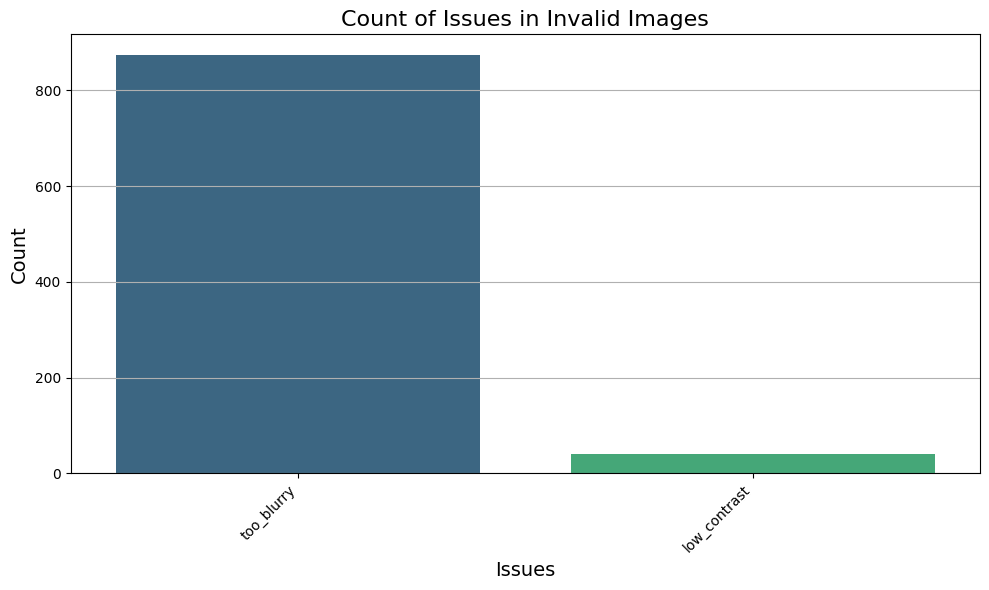

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.read_csv('drive/MyDrive/Chest_Xray_Dataset/quality_results/quality_results.csv')

invalid_images = results_df[results_df['is_valid'] == False]

issues = []
for issues_list in invalid_images['issues']:
    cleaned_issues = issues_list.strip('[]').replace("'", "").split(', ')

    for issue in cleaned_issues:
        cleaned_issue = issue.strip().lower()
        issues.append(cleaned_issue)

issue_counts = pd.Series(issues).value_counts().reset_index()
issue_counts.columns = ['Issue', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=issue_counts, x='Issue', y='Count', hue='Issue', palette='viridis', legend=False)
plt.title('Count of Issues in Invalid Images', fontsize=16)
plt.xlabel('Issues', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


According to this analysis, main problem about too blurry. Therefore, check only blurring problem for entire datasets to improve time consuming process.

In [15]:
import cv2
import numpy as np
from pathlib import Path

class BlurChecker:
    """
    A class for checking blur in images.

    Parameters:
        blur_threshold (int): Threshold for blur detection (lower means more strict)
    """

    def __init__(self, blur_threshold=50):
        self.blur_threshold = blur_threshold

    def check_image(self, image):
        """
        Checks if an image passes the blur quality threshold.

        Args:
            image: numpy array of the image (BGR format)

        Returns:
            dict: Results containing validity and blur score
        """
        results = {
            'is_valid': True,
            'issues': [],
            'metrics': {}
        }

        # Blur check
        blur_score = self._check_blur(image)
        results['metrics']['blur_score'] = blur_score
        if blur_score < self.blur_threshold:
            results['is_valid'] = False
            results['issues'].append('too_blurry')

        return results

    def process_image_path(self, image_path):
        """
        Process a single image from its file path.

        Args:
            image_path: str or Path object pointing to the image file

        Returns:
            dict: Blur check results including file path
        """
        try:
            image = cv2.imread(str(image_path))
            if image is None:
                return {
                    'path': str(image_path),
                    'is_valid': False,
                    'issues': ['failed_to_load'],
                    'metrics': {}
                }

            results = self.check_image(image)
            results['path'] = str(image_path)

            return results

        except Exception as e:
            return {
                'path': str(image_path),
                'is_valid': False,
                'issues': [f'error: {str(e)}'],
                'metrics': {}
            }

    def _check_blur(self, image):
        """Calculate image blur score using Laplacian variance"""
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return cv2.Laplacian(image, cv2.CV_64F).var()

In [16]:
import concurrent.futures
import os
import pandas as pd
from tqdm import tqdm

def process_blur_quality(image_paths, batch_size=100, num_workers=4,
                         save_results=True, output_dir='quality_results'):
  """
  Process multiple images and generate a blur quality report.

  Args:
      image_paths: List of image paths to process
      batch_size: Number of images to process in each batch
      num_workers: Number of parallel workers
      save_results: Whether to save results to files
      output_dir: Directory to save result files

  Returns:
      tuple: (quality_stats, problematic_images)
  """
  checker = BlurChecker()  # Assumes checker has a blur checking method
  all_results = []
  problematic_images = []

  # Process images in batches with progress bar
  total_batches = (len(image_paths) + batch_size - 1) // batch_size

  for batch_idx in tqdm(range(total_batches), desc="Processing images"):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(image_paths))
    batch_paths = image_paths[start_idx:end_idx]

    with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
      batch_results = list(executor.map(checker.process_image_path, batch_paths))

    for result in batch_results:
      all_results.append(result)
      if not result['is_valid']:  # Assuming 'is_valid' is determined by blur check
        problematic_images.append(result['path'])

  # Calculate statistics
  quality_stats = {
    'total_images': len(image_paths),
    'valid_images': sum(1 for r in all_results if r['is_valid']),
    'invalid_images': sum(1 for r in all_results if not r['is_valid']),
    'issues': {'blur': sum(1 for r in all_results if not r['is_valid'])},
    'metrics': {
        'blur_scores': [r['metrics']['blur_score'] for r in all_results if 'metrics' in r and 'blur_score' in r['metrics']]
    }
}

  # Save results if requested
  if save_results:
    os.makedirs(output_dir, exist_ok=True)
    df_results = pd.DataFrame(all_results)
    df_results.to_csv("drive/MyDrive/Chest_Xray_Dataset/blur_quality_results.csv", index=False)

    with open(f"{output_dir}/blur_quality_summary.txt", 'w') as f:
      f.write("Blur Quality Analysis Summary\n")
      f.write("=" * 30 + "\n")
      f.write(f"Total Images: {quality_stats['total_images']}\n")
      f.write(f"Valid Images: {quality_stats['valid_images']}\n")
      f.write(f"Invalid Images: {quality_stats['invalid_images']}\n\n")

      f.write("Issues Found:\n")
      f.write(f"Blur Issues: {quality_stats['issues']['blur']}\n")
  return quality_stats, problematic_images

Examine all data for blurring problem.

In [19]:
"""Do not run this code more than once."""
from pathlib import Path

# Initialize an empty list to hold all image paths
all_image_paths = []

# Collect image paths from all subfolders
for i in range(1, 13):
  dataset_path = Path(base_path + f"images_00{i}/images")
  image_paths = list(dataset_path.glob("**/*.png"))  # Finds all .png files
  all_image_paths.extend(image_paths)  # Add paths to the main list

# Ensure there are paths before processing
if all_image_paths:
  # Process the combined list of image paths
  stats, problematic = process_blur_quality(
    all_image_paths,
    batch_size=500,     # Adjust based on your memory
    num_workers=4,      # Adjust based on your CPU cores
    save_results=True,
    output_dir='quality_results'
  )

  # Print summary
  print(f"Total images processed: {stats['total_images']}")
  print(f"Valid images: {stats['valid_images']}")
  print(f"Invalid images: {stats['invalid_images']}")

else:
  print("No images found to process.")

Processing images: 100%|██████████| 170/170 [4:32:07<00:00, 96.04s/it] 


Total images processed: 84999
Valid images: 76175
Invalid images: 8824


To solve blurring problem, apply sharpenening filter the images which suffer from the blurring problem. Then display a sample of sharpenned images.

Processed 400 images out of 8824 - Progress: 4.53%
Processed 800 images out of 8824 - Progress: 9.07%
Processed 1200 images out of 8824 - Progress: 13.60%
Processed 1600 images out of 8824 - Progress: 18.13%
Processed 2000 images out of 8824 - Progress: 22.67%
Processed 2400 images out of 8824 - Progress: 27.20%
Processed 2800 images out of 8824 - Progress: 31.73%
Processed 3200 images out of 8824 - Progress: 36.26%
Processed 3600 images out of 8824 - Progress: 40.80%
Processed 4000 images out of 8824 - Progress: 45.33%
Processed 4400 images out of 8824 - Progress: 49.86%
Processed 4800 images out of 8824 - Progress: 54.40%
Processed 5200 images out of 8824 - Progress: 58.93%
Processed 5600 images out of 8824 - Progress: 63.46%
Processed 6000 images out of 8824 - Progress: 68.00%
Processed 6400 images out of 8824 - Progress: 72.53%
Processed 6800 images out of 8824 - Progress: 77.06%
Processed 7200 images out of 8824 - Progress: 81.60%
Processed 7600 images out of 8824 - Progress: 86.1

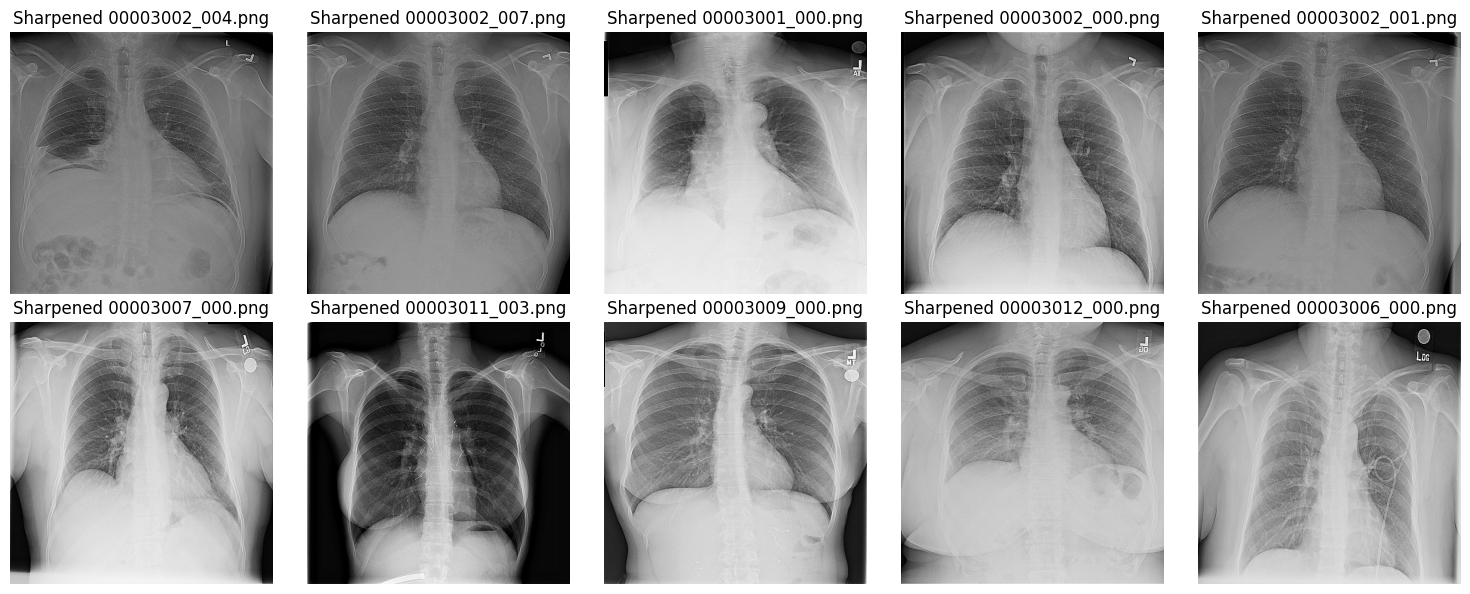

In [2]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

def sharpen_image(img_path):
    original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if original is None:
        print(f"Warning: Could not read image {img_path}.")
        return None
    original = cv2.resize(original, (450, 450))

    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])

    sharpened = cv2.filter2D(src=original, ddepth=-1, kernel=sharpening_kernel)
    return sharpened

def process_and_save_images_from_csv(csv_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    df = pd.read_csv(csv_path)

    # Select only rows where 'is_valid' column is False
    invalid_df = df[df['is_valid'] == False]
    image_paths = invalid_df['path'].tolist()

    total_images = len(image_paths)

    for i, img_path in enumerate(image_paths):
        sharpened_image = sharpen_image(img_path)

        if sharpened_image is not None:
            image_name = os.path.basename(img_path)
            output_path = os.path.join(output_dir, image_name)
            cv2.imwrite(output_path, sharpened_image)

        # Every 400 images, print progress
        if (i + 1) % 400 == 0:
            progress = (i + 1) / total_images * 100
            print(f"Processed {i + 1} images out of {total_images} - Progress: {progress:.2f}%")

def display_processed_images(output_dir, num_images):
    processed_images = [f for f in os.listdir(output_dir) if f.endswith(('.png', '.jpg'))]
    num_images = min(num_images, len(processed_images))

    cols = 5
    rows = (num_images // cols) + (num_images % cols > 0)

    plt.figure(figsize=(15, rows * 3))

    for i, image_file in enumerate(processed_images[:num_images]):
        image_path = os.path.join(output_dir, image_file)
        image = cv2.imread(image_path)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Sharpened {image_file}")

    plt.tight_layout()
    plt.show()

# Main file paths and parameters
csv_path = "drive/MyDrive/Chest_Xray_Dataset/blur_quality_results.csv"
output_directory = "drive/MyDrive/Chest_Xray_Dataset/processed_images"
number_of_images_to_display = 10

# Run the process
process_and_save_images_from_csv(csv_path, output_directory)
display_processed_images(output_directory, number_of_images_to_display)